In [36]:
import pandas as pd
import numpy as np

In [ ]:
# For mongodb
from pymongo import MongoClient

MONGO_URI = "mongodb://localhost:27017/"  
DATABASE_NAME = "Ecommerce"
COLLECTION_NAME = "customer"


client = MongoClient(MONGO_URI)


db = client[DATABASE_NAME]
collection = db[COLLECTION_NAME]


data = list(collection.find())


df = pd.DataFrame(data)


if '_id' in df.columns:
    df = df.drop(columns=['_id'])

print(df.head())

client.close()


In [ ]:
# For local file
df = pd.read_csv("/content/ECommerce_consumer behaviour.csv")
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13.0,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16.0,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16.0,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4.0,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4.0,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
1689523,29365,17099,10,1,17,30.0,106,3,0,12.0,meat seafood,hot dogs bacon sausage
1689524,29365,17099,10,1,17,30.0,52,4,1,1.0,frozen,frozen breakfast
1689525,29365,17099,10,1,17,30.0,63,5,1,9.0,dry goods pasta,grains rice dried goods
1689526,29365,17099,10,1,17,30.0,129,6,1,1.0,frozen,frozen appetizers sides


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689528 entries, 0 to 1689527
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1689528 non-null  int64  
 1   user_id                 1689528 non-null  int64  
 2   order_number            1689528 non-null  int64  
 3   order_dow               1689528 non-null  int64  
 4   order_hour_of_day       1689528 non-null  int64  
 5   days_since_prior_order  1585157 non-null  float64
 6   product_id              1689528 non-null  int64  
 7   add_to_cart_order       1689528 non-null  int64  
 8   reordered               1689528 non-null  int64  
 9   department_id           1689527 non-null  float64
 10  department              1689527 non-null  object 
 11  product_name            1689527 non-null  object 
dtypes: float64(2), int64(8), object(2)
memory usage: 154.7+ MB


In [40]:
df.isna().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,104371
product_id,0
add_to_cart_order,0
reordered,0
department_id,1


In [41]:
df.duplicated().sum()

17384

In [42]:
df.nunique() # count no of unique values in a dataframe

,0
order_id,165541
user_id,94621
order_number,100
order_dow,7
order_hour_of_day,24
days_since_prior_order,31
product_id,134
add_to_cart_order,109
reordered,2
department_id,21


In [43]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,1.689528e+06,1.689528e+06,1.689528e+06,1.689528e+06,1.689528e+06,1.585157e+06,1.689528e+06,1.689528e+06,1.689528e+06,1.689527e+06
mean,1.708462e+06,1.031424e+05,1.712986e+01,2.734103e+00,1.344234e+01,1.139776e+01,7.121951e+01,8.357404e+00,5.897345e-01,9.930420e+00
std,9.862439e+05,5.949905e+04,1.750387e+01,2.094548e+00,4.242543e+00,8.969128e+00,3.820341e+01,7.130025e+00,4.918820e-01,6.284585e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.549600e+05,5.171800e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.706941e+06,1.027280e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.560343e+06,1.548010e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421074e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.090000e+02,1.000000e+00,2.100000e+01


In [44]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)

In [45]:
df['days_since_prior_order'] = df['days_since_prior_order'].astype(int)

# Number of Purchases by day

array([<Axes: ylabel='count'>], dtype=object)

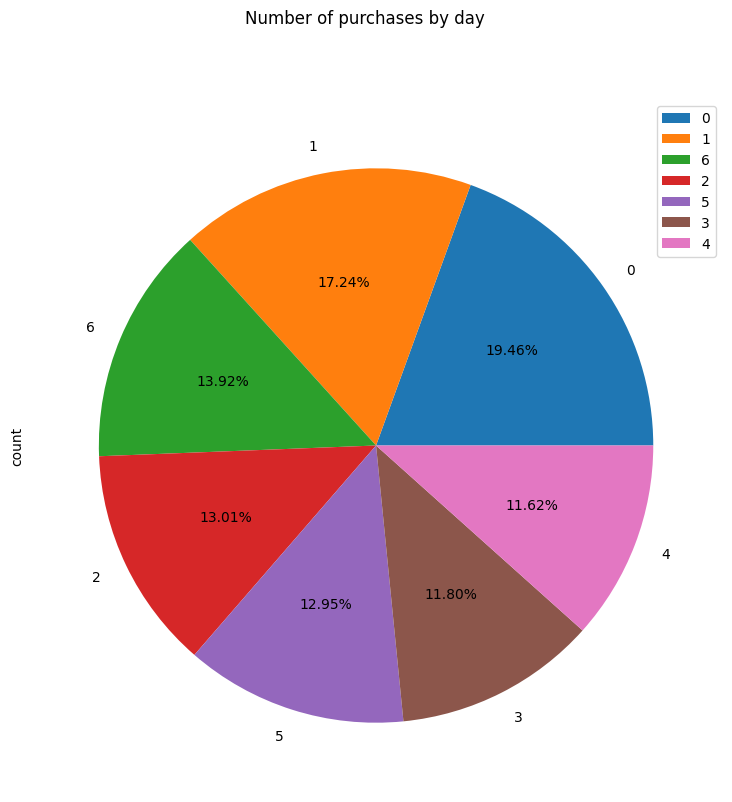

In [46]:
df.groupby('order_dow')['user_id'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Number of purchases by day',figsize=(9,9))

In [47]:
df.groupby('order_hour_of_day', as_index=False).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)

,order_hour_of_day,user_id
10,10,144195
11,11,142750
14,14,140773
15,15,139524
13,13,139062
12,12,137340
16,16,133165
9,9,125305
17,17,107858
8,8,88795


In [48]:
def order_time(x):
    if x in [6,7,8,9,10,11,12]:
        return 'Morning'
    if x in [13,14,15,16,17]:
        return 'Afternoon'
    if x in [18,19,20,21,22]:
        return 'Evening'
    if x in [23,24,0,1,2,3,4,5]:
        return 'Night'
    return x

In [49]:
df['order_time_list']=df['order_hour_of_day'].apply(order_time)

In [50]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list
0,2425083,49125,1,2,18,0,17,1,0,13.0,pantry,baking ingredients,Evening
1,2425083,49125,1,2,18,0,91,2,0,16.0,dairy eggs,soy lactosefree,Evening
2,2425083,49125,1,2,18,0,36,3,0,16.0,dairy eggs,butter,Evening
3,2425083,49125,1,2,18,0,83,4,0,4.0,produce,fresh vegetables,Evening
4,2425083,49125,1,2,18,0,83,5,0,4.0,produce,fresh vegetables,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689523,29365,17099,10,1,17,30,106,3,0,12.0,meat seafood,hot dogs bacon sausage,Afternoon
1689524,29365,17099,10,1,17,30,52,4,1,1.0,frozen,frozen breakfast,Afternoon
1689525,29365,17099,10,1,17,30,63,5,1,9.0,dry goods pasta,grains rice dried goods,Afternoon
1689526,29365,17099,10,1,17,30,129,6,1,1.0,frozen,frozen appetizers sides,Afternoon


<Axes: title={'center': 'Time of day when, the order was made'}, xlabel='order_time_list'>

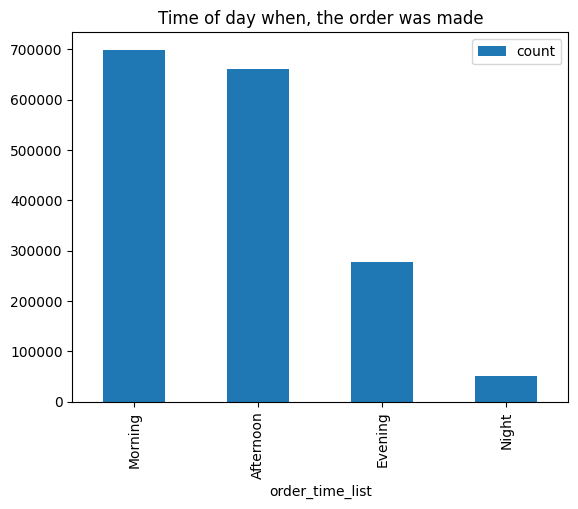

In [51]:
df.groupby('order_time_list')['user_id'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='bar',title='Time of day when, the order was made')

In [52]:
df.pivot_table(index='order_dow',columns='order_time_list',values='user_id',aggfunc=['count'])

count                      
order_time_list Afternoon Evening Morning Night
order_dow                                      
0                  136109   50455  132754  9430
1                  107953   42618  133183  7554
2                   84512   38326   90213  6734
3                   79150   34905   79140  6171
4                   75092   38372   76242  6684
5                   84557   35536   91626  7059
6                   93009   38481   95977  7686

<Axes: title={'center': 'The time when the order was made by day and time of day'}, xlabel='order_dow'>

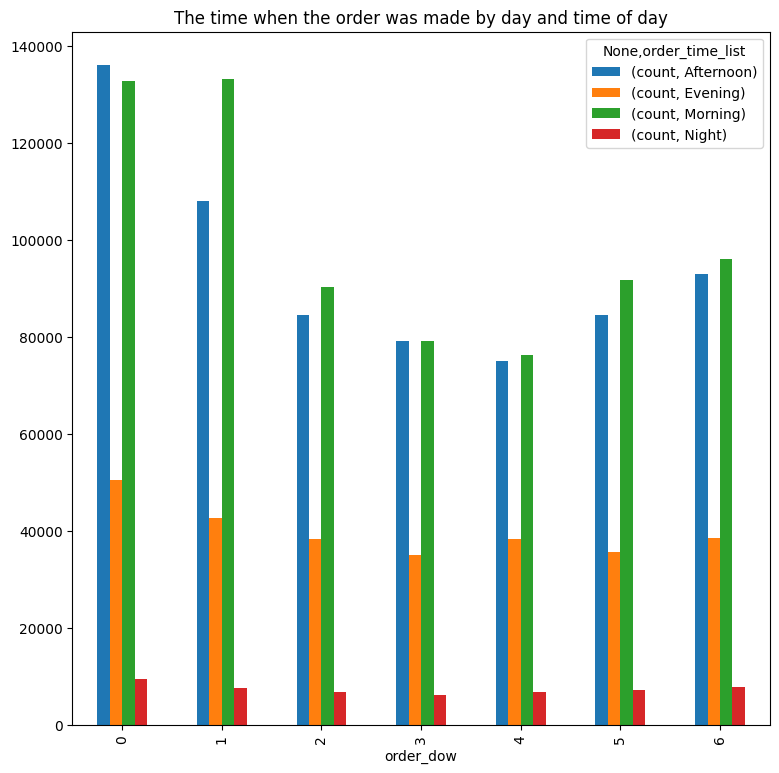

In [53]:
df.pivot_table(index='order_dow',columns='order_time_list',values='user_id',aggfunc=['count']).plot(kind='bar',title='The time when the order was made by day and time of day',figsize=(9,9))

# The number of orders that users have made

In [54]:
df.groupby('order_number')['user_id'].agg(['count'])

,count
order_number,
1,104371
2,101853
3,101187
4,99789
5,88239
...,...
96,910
97,739
98,683


In [55]:
def order_number_group(x):
    if x <= 20 :
        x= '1-20 orders'
    elif x >20 and x <=40:
        x= '21-40 orders'
    elif x >40 and x <=60:
        x= '41-60 orders'
    elif x >60 and x <=80:
        x= '61-80 orders'
    else:
        x= '81-100 orders'
    return x

In [56]:
df['order_number_group']=df['order_number'].apply(order_number_group)

array([<Axes: ylabel='count'>], dtype=object)

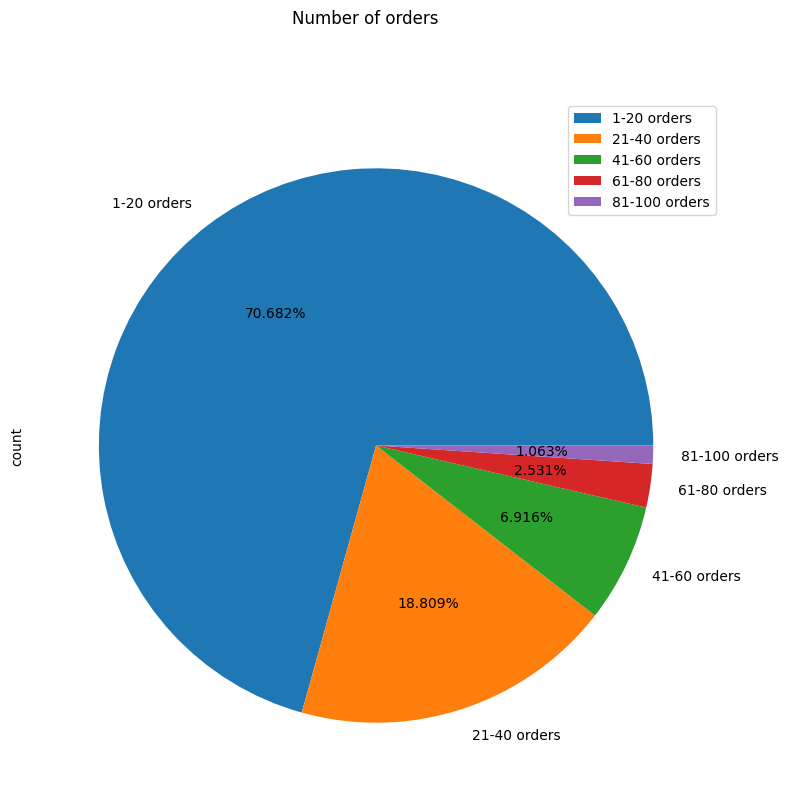

In [57]:
df.groupby('order_number_group')['user_id'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.3f%%',subplots=True,title='Number of orders',figsize=(9,9))

# How many days have passed since the pre-order

<Axes: title={'center': 'Days since prior order'}, xlabel='days_since_prior_order'>

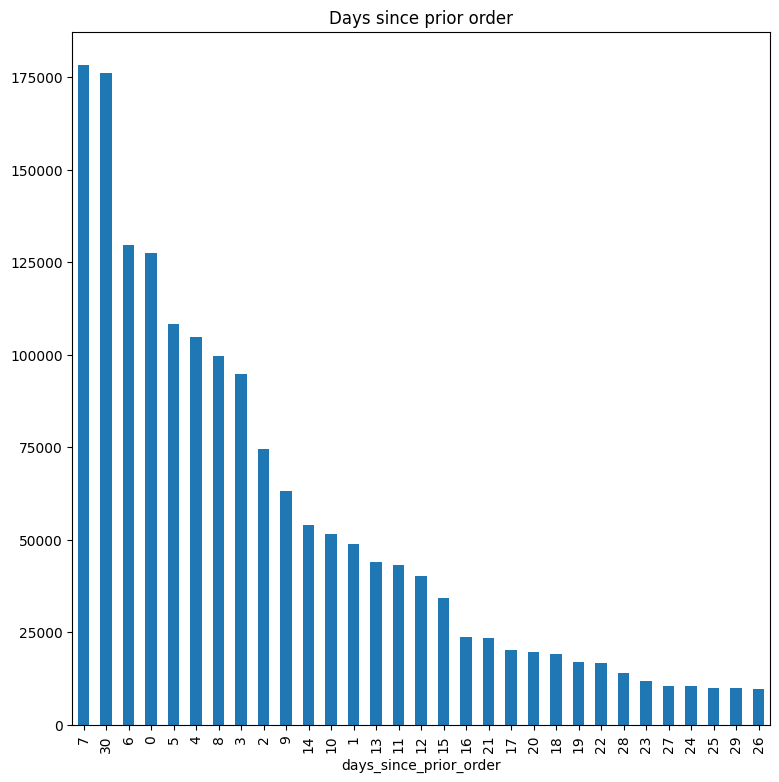

In [58]:
df.groupby('days_since_prior_order')['user_id'].agg('count').sort_values(ascending=False).plot(kind='bar',title='Days since prior order',figsize=(9,9))

# Top 15 most popular products from users

array([<Axes: ylabel='count'>], dtype=object)

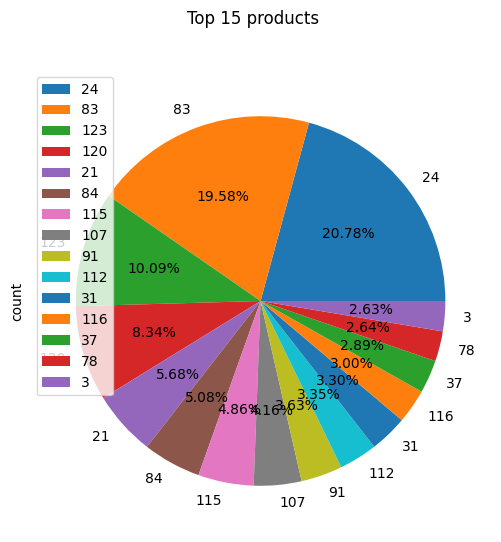

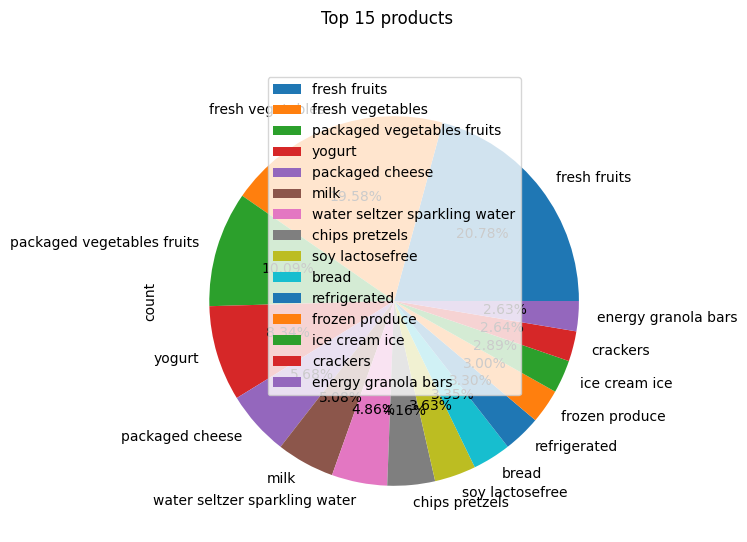

In [59]:
df.groupby('product_id')['user_id'].agg(['count']).sort_values(by='count',ascending=False).head(15).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Top 15 products',figsize=(6,6))
df.groupby('product_name')['user_id'].agg(['count']).sort_values(by='count',ascending=False).head(15).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Top 15 products',figsize=(6,6))

# Storing Data in SQL server

In [ ]:
import pyodbc

In [ ]:

# SQL Server connection details
SQL_SERVER = "LAPTOP-84NV2TCB"
DATABASE = "DATABASE CA"
USERNAME = ""  # Provide if required
PASSWORD = ""  # Provide if required

# Example DataFrame (replace this with your actual data)
data = df

# SQL Server connection
connection = pyodbc.connect(f'''DRIVER=ODBC Driver 17 for SQL Server;
                                SERVER={SQL_SERVER};
                                DATABASE={DATABASE};
                                Trusted_connection=yes;''')

cur = connection.cursor()

# Create table if it doesn't exist
cur.execute('''
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Orders' AND xtype='U')
CREATE TABLE Orders (
    order_id INT,
    user_id INT,
    order_number INT,
    order_dow INT,
    order_hour_of_day INT,
    days_since_prior_order INT,
    product_id INT,
    add_to_cart_order INT,
    reordered BIT,
    department_id INT,
    department VARCHAR(255),
    product_name VARCHAR(255),
    order_time_list VARCHAR(255),
    order_number_group VARCHAR(255)
)
''')

# Insert data into the table
insert_query = """
INSERT INTO Orders (
    order_id, user_id, order_number, order_dow, order_hour_of_day,
    days_since_prior_order, product_id, add_to_cart_order, reordered,
    department_id, department, product_name, order_time_list, order_number_group
) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);
"""

for _, row in data.iterrows():
    cur.execute(insert_query, row['order_id'], row['user_id'], row['order_number'],
                row['order_dow'], row['order_hour_of_day'], row['days_since_prior_order'],
                row['product_id'], row['add_to_cart_order'], row['reordered'],
                row['department_id'], row['department'], row['product_name'],
                row['order_time_list'], row['order_number_group'])

# Commit the transaction
connection.commit()

# Close the connection
cur.close()
connection.close()

print("Data inserted successfully!")
